In [1]:
# Importing the required modules
!pip install catboost

     |████████████████████████████████| 76.3 MB 1.1 MB/s 


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


In [3]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/PW22RBA01 Capstone Project/Phase2/AP Data Analysis/With Indices/NDWI/Cleaned_Soil.csv')
# Importing the dataset
# df = pd.read_csv('Cleaned_Soil.csv')

Mounted at /content/drive


In [4]:
# Obtaining data specific to Anantapur

In [5]:
df = df[df['District'] == 'Kurnool']
df.head()

,Unnamed: 0,Latitude,Longitude,District,Mandal,Village,SoilType,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,NDVI,ARVI,EVI,GCI,NDWI,Crop
1700,1702,15.34,78.32,Kurnool,Banaganpalli,Applapuram,Black,8.62,0.98,0.37,4.10,192.0,7280.0,878.0,58.30,0.43,2.71,13.79,1.04,7.36,0.228808,0.143780,0.219145,0.661369,-0.248507,Chickpea
1701,1703,15.34,78.32,Kurnool,Banaganpalli,Applapuram,Black,8.22,0.31,0.32,5.46,212.0,9156.0,1006.0,4.54,0.40,0.93,13.81,1.29,19.02,0.228808,0.143780,0.219145,0.661369,-0.248507,Chickpea
1702,1704,15.33,78.32,Kurnool,Banaganpalli,Applapuram,Black,8.27,0.41,0.42,9.21,299.0,8995.0,1454.0,13.67,0.40,1.14,13.79,1.27,25.99,0.302195,0.175457,0.345572,0.996307,-0.332512,Chickpea
1703,1705,15.34,78.31,Kurnool,Banaganpalli,Applapuram,Black,8.63,0.23,0.42,4.11,196.0,7970.0,1164.0,3.45,0.44,1.02,12.29,1.03,8.57,0.069411,0.020382,0.214410,0.205302,-0.093095,Pigeonpea
1704,1706,15.34,78.32,Kurnool,Banaganpalli,Applapuram,Black,8.56,0.34,0.22,4.27,200.0,8759.0,1283.0,3.18,0.38,1.16,10.87,1.12,18.94,0.228808,0.143780,0.219145,0.661369,-0.248507,Jowar


In [6]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village', 'ARVI', 'EVI', 'GCI', 'NDVI'], axis = 1)
df.describe()

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,NDWI
count,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000
mean,8.080000,0.503658,0.341473,13.335202,147.907363,4124.760095,610.743468,37.752613,0.590119,1.224513,8.605273,1.036271,10.871853,-0.228084
std,0.813024,1.162643,0.135343,12.325002,129.306644,3183.363217,534.631347,162.019220,0.591689,1.357217,5.691184,0.536504,5.732182,0.099870
min,5.210000,0.030000,0.060000,0.540000,23.000000,145.000000,27.000000,1.690000,0.130000,0.110000,0.740000,0.250000,1.400000,-0.433467
25%,7.640000,0.180000,0.260000,4.670000,92.000000,997.000000,202.000000,5.160000,0.320000,0.490000,4.870000,0.680000,6.560000,-0.316804
50%,8.300000,0.280000,0.330000,9.300000,133.000000,3555.000000,484.000000,8.520000,0.400000,0.860000,7.430000,0.950000,9.740000,-0.238360
75%,8.680000,0.400000,0.410000,19.220000,183.000000,7280.000000,943.000000,18.220000,0.610000,1.400000,10.860000,1.210000,13.670000,-0.133305
max,9.430000,16.950000,1.050000,109.090000,2409.000000,9538.000000,5363.000000,2539.580000,6.110000,13.730000,41.370000,3.440000,40.170000,-0.036139


In [7]:
# Analysis of SoilType

In [8]:
df.SoilType.unique()

array(['Black', 'Nalla regadi', 'Red', 'Chowdu', 'Black & Red', 'Garuku',
       'Red ', 'Sowdu', 'Sudda', 'Thella kattu', 'Black & Mooru',
       'Chowdu +Nalla regadi', 'Sand+Ondu+White', 'Sudda Neela',
       'Sand +Ondu', 'Sand', 'Gurugu ', 'Tella masaka',
       'Chowdu + Nalla regadi', 'Nalla savudu', 'Regadi', 'Black, chowdu',
       'Chowdu+ Nalla regadi', 'Chowdu+ Red', 'Chowdu +Black',
       'Erra maska', 'Nalla regadi + chowdu', 'Sand +Chowdu',
       'Chowdu Sudda', 'Black + Chowdu', 'Chowdu + Black', 'sand', 'red',
       'Alkhaline'], dtype=object)

In [9]:
df['SoilType'] = df['SoilType'].replace(['Red', 'red', 'Chowdu+ Red', 'Red '], 'Red Soil')
df['SoilType'] = df['SoilType'].replace(['Black', 'Black, chowdu', 'Black + Chowdu', 'Black & Mooru'], 'Black Soil')
df = df[(df['SoilType'] == 'Red Soil') | (df['SoilType'] == 'Black Soil')]

In [10]:
soilCount = dict(df['SoilType'].value_counts())
for i in soilCount.keys():
    if i not in ['Red Soil', 'Black Soil']:
        soilCount.pop(i)
soilCount

{'Black Soil': 152, 'Red Soil': 158}

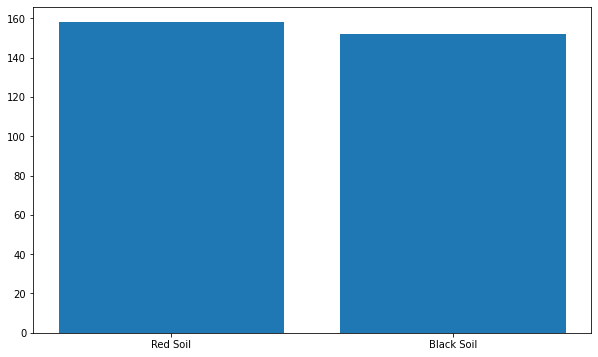

In [11]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)
df = df.drop(['SoilType'], axis=1)

In [12]:
# Analysis of Crops grown 

In [13]:
df.Crop.unique()

array(['Chickpea', 'Pigeonpea', 'Jowar', 'Coriandam', 'Blackgram',
       'Bengalgram', 'Redgram', 'Cotton', 'Paddy', 'JOWAR', 'Paddy,jowar',
       'Fodder Crops', 'Dhanyalu', 'Jonna, Senaga', 'Senaga', 'Pogaku',
       'Mahendra Jonna', 'Merappa ; Senaga', 'Menumu', 'Pacha Jonna',
       'Jonna', 'Vari', 'Sunflower', 'Cottan', 'Ground Nat,Cottan',
       'Oniyan,Ground Nat', 'cotton', 'ground nut',
       'ground nut/groundnut', 'groundnut', 'Cottan,Ground Nat',
       'Grounat', 'Ground Nat', 'Cottan ,Groundnat', 'Cottan,',
       'Groundnut', 'Groundnut,Cottan', 'Ground nut,Cottan',
       'Cottan,Castral', 'GroundNut', 'Castor', 'GroundNut,Cotton',
       'Ground nut', 'Cotton,Vegitable', 'Ground nut,castor',
       'Ground nut ,Mirchi', 'Cotton,Ground Nut', 'Ground Nut',
       'Cotton,castor', 'Ground Nut, Cotton', 'Ground Nut,jowar',
       'Ground Nut ,Cotton', 'Clastor', 'Cotton,Groundnut'], dtype=object)

In [14]:
df['Crop'].value_counts()

Cotton                  83
Groundnut               44
Cottan                  16
Bengalgram              13
Jowar                   11
Senaga                  10
Ground Nut               9
Paddy                    9
Jonna                    8
Coriandam                8
GroundNut                7
Vari                     7
Sunflower                6
Mahendra Jonna           6
Ground Nat               5
Dhanyalu                 5
Cottan,Ground Nat        5
ground nut/groundnut     4
cotton                   4
Redgram                  4
Blackgram                4
Chickpea                 3
Cotton,Ground Nut        2
Pacha Jonna              2
Clastor                  2
Groundnut,Cottan         2
Ground Nut,jowar         2
Paddy,jowar              2
Ground nut,castor        2
Oniyan,Ground Nat        1
JOWAR                    1
Pigeonpea                1
Cottan ,Groundnat        1
Ground nut               1
Cottan,Castral           1
Cottan,                  1
Fodder Crops             1
J

GroundNut + Cotton    202
Jowar                  30
BengalGram             25
Coriander              13
Name: Crop, dtype: int64


<BarContainer object of 4 artists>

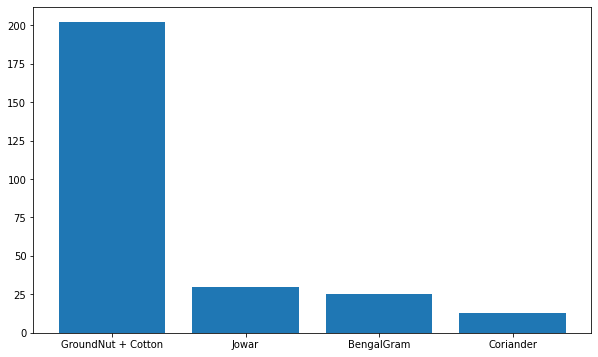

In [15]:
df['Crop'] = df['Crop'].replace('chill', 'Chilli')
df['Crop'] = df['Crop'].replace(['MAZI', 'maize', 'Mazi'], 'Maize')
df['Crop'] = df['Crop'].replace(['Bengalgram', 'Senaga', 'Merappa ; Senaga', 'Erra senaga', 'Jonna, Senaga', 'Jonna/Senaga'], 'BengalGram')
df['Crop'] = df['Crop'].replace(['jowar', 'Jowar', 'JOWAR', 'Jonna', 'Mahendra Jonna', 'Pacha Jonna', 'Erra Jonna', 'Veru senaga, Jonna', 'Jonna+ sunflower', 'Paddy,jowar'],'Jowar')
df['Crop'] = df['Crop'].replace('Vari','BarnyardMillet')
df['Crop'] = df['Crop'].replace(['Dhanyalu', 'Coriandam', 'Dhanyalu , Jonnalu'], 'Coriander')
df['Crop'] = df['Crop'].replace(['Oniyan,Ground Nat', 'ground nut', 'ground nut/groundnut', 'groundnut', 'Grounat', 'Ground Nat', 'Groundnut', 'GroundNut', 'Ground nut', 'Ground nut,castor', 'Ground nut ,Mirchi', 'Ground Nut', 'Ground Nut,jowar'],'GroundNut')
df['Crop'] = df['Crop'].replace(['Cottan', 'cotton', 'Cottan,', 'Cottan,Castral', 'Cotton,Vegitable', 'Cotton,castor'],'Cotton')
df['Crop'] = df['Crop'].replace(['Ground Nat,Cottan', 'Cottan,Ground Nat', 'Cottan ,Groundnat', 'Groundnut,Cottan', 'Ground nut,Cottan', 'GroundNut,Cotton', 'Cotton,Ground Nut', 'Ground Nut, Cotton', 'Ground Nut ,Cotton', 'Cotton,Groundnut', 'Cotton', 'GroundNut'], 'GroundNut + Cotton')
df = df[(df['Crop'] != 'Clastor') & (df['Crop'] != 'Castor') & (df['Crop'] != 'Onian') & (df['Crop'] != 'Korra, Maagu') & (df['Crop'] != 'Menumu') & (df['Crop'] != 'Peasara + Pacha Gaddi')]
df = df[(df['Crop'] != 'Chickpea') & (df['Crop'] != 'Pigeonpea') & (df['Crop'] != 'Blackgram') & (df['Crop'] != 'Redgram') & (df['Crop'] != 'Fodder Crops') & (df['Crop'] != 'Pogaku')]
df = df[(df['Crop'] != 'Sunflower') & (df['Crop'] != 'Paddy') & (df['Crop'] != 'BarnyardMillet')]

print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [16]:
# Getting rid of features that have a high correlation among one another

In [17]:
cor_matrix = df.corr()
cor_matrix

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,NDWI
pH,1.000000,0.154581,0.147291,-0.398731,0.350931,0.626788,0.643470,0.075312,-0.127017,0.372085,-0.273208,0.108424,-0.416163,0.312181
EC,0.154581,1.000000,0.047219,-0.090406,0.135849,0.171570,0.157315,0.898074,-0.009813,0.760557,-0.010272,0.054859,-0.048448,0.110032
OC,0.147291,0.047219,1.000000,0.342842,0.606173,0.200203,0.247514,0.026382,0.316863,0.156429,0.104527,0.468411,0.272497,0.082260
P,-0.398731,-0.090406,0.342842,1.000000,0.070703,-0.513249,-0.387599,-0.064982,0.469348,-0.228942,-0.053793,-0.013029,0.173210,-0.178855
K,0.350931,0.135849,0.606173,0.070703,1.000000,0.529954,0.529136,0.076988,0.148299,0.332151,0.263453,0.413098,0.199230,0.182468
Ca,0.626788,0.171570,0.200203,-0.513249,0.529954,1.000000,0.910068,0.137835,-0.179656,0.484463,0.309439,0.389341,0.018532,0.248261
Mg,0.643470,0.157315,0.247514,-0.387599,0.529136,0.910068,1.000000,0.129683,-0.059716,0.529157,0.238333,0.465359,0.034844,0.252823
S,0.075312,0.898074,0.026382,-0.064982,0.076988,0.137835,0.129683,1.000000,0.002336,0.762918,0.001949,0.049728,-0.012802,0.102552
Zn,-0.127017,-0.009813,0.316863,0.469348,0.148299,-0.179656,-0.059716,0.002336,1.000000,0.033656,-0.070543,0.268873,0.211985,-0.121424
B,0.372085,0.760557,0.156429,-0.228942,0.332151,0.484463,0.529157,0.762918,0.033656,1.000000,0.077278,0.263906,-0.022490,0.189281


In [18]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)

Columns to be dropped :  ['K', 'Ca', 'Mg', 'S', 'B', 'Mn']


In [19]:
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns taken into consideration :  ['pH', 'EC', 'OC', 'P', 'Zn', 'Fe', 'Cu', 'NDWI', 'Crop']


In [20]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [21]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
print(y.head(1))
X = X.values
y = y.values

        pH    EC    OC     P    Zn     Fe    Cu      NDWI
1704  8.56  0.34  0.22  4.27  0.38  10.87  1.12 -0.248507
1704    Jowar
Name: Crop, dtype: object


In [22]:
# Standardizing the independent variables using Feature Scaling
sc1 = StandardScaler()
X[:, :] = sc1.fit_transform(X[:, :])

In [23]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [24]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [25]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [26]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7941176470588235


In [27]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 79.19 %
Standard Deviation: 4.91 %


# Decision Tree Classifier

In [28]:
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [29]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [30]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7794117647058824


In [31]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 75.29 %
Standard Deviation: 7.46 %


# Random Forest Classifier

In [32]:
clf3 = RandomForestClassifier(random_state=0)
clf3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [33]:
y_test_pred = clf3.predict(X_test)
y_train_pred = clf3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [34]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7941176470588235


In [35]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 78.19 %
Standard Deviation: 6.81 %


In [36]:
# pickle.dump(clf3, open('Kurnool_model.pkl', 'wb'))
# pickle.dump(sc1, open('Kurnool_scaler.pkl', 'wb'))

# XGBoost

In [37]:
clf4 = HistGradientBoostingClassifier(random_state=0)
clf4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [38]:
y_test_pred = clf4.predict(X_test)
y_train_pred = clf4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [39]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7647058823529411


In [40]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4, X = X_train, y = y_train, cv = 10)

In [41]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 76.24 %
Standard Deviation: 6.22 %


# Multi-layer Perceptron Classifier

In [42]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [43]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [44]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.8217821782178217
Testing Accuracy:  0.7941176470588235


In [45]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 78.21 %
Standard Deviation: 5.99 %


# Catboost

In [46]:
from catboost import CatBoostClassifier, Pool, cv

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 0.7909349	total: 46.5ms	remaining: 4.6s
1:	learn: 0.5951499	total: 47.5ms	remaining: 2.33s
2:	learn: 0.5502222	total: 48.1ms	remaining: 1.55s
3:	learn: 0.4779598	total: 48.9ms	remaining: 1.17s
4:	learn: 0.4528026	total: 49.6ms	remaining: 942ms
5:	learn: 0.4447379	total: 50ms	remaining: 784ms
6:	learn: 0.4282527	total: 50.6ms	remaining: 673ms
7:	learn: 0.4192811	total: 51.2ms	remaining: 589ms
8:	learn: 0.3980421	total: 51.9ms	remaining: 524ms
9:	learn: 0.3755615	total: 52.5ms	remaining: 472ms
10:	learn: 0.3716634	total: 53.1ms	remaining: 430ms
11:	learn: 0.3631099	total: 53.7ms	remaining: 394ms
12:	learn: 0.3453678	total: 54.4ms	remaining: 364ms
13:	learn: 0.3403767	total: 54.9ms	remaining: 338ms
14:	learn: 0.3362476	total: 55.5ms	remaining: 315ms
15:	learn: 0.3325823	total: 56.2ms	remaining: 295ms
16:	learn: 0.3294259	total: 56.9ms	remaining: 278ms
17:	learn: 0.3160029	total: 57.9ms	remaining: 264ms
18:	learn: 0.3073316	total: 58.6ms	remaining: 250ms
19:	learn: 0.3041909	tota

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.5564085452
bestIteration = 99

Training on fold [1/5]

bestTest = 0.6188225214
bestIteration = 99

Training on fold [2/5]

bestTest = 0.5589951212
bestIteration = 99

Training on fold [3/5]

bestTest = 0.5653619763
bestIteration = 99

Training on fold [4/5]

bestTest = 0.5983076226
bestIteration = 97



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Streaming output truncated to the last 5000 lines.
2:	learn: 1.2075923	total: 93ms	remaining: 30.9s
3:	learn: 1.1719908	total: 123ms	remaining: 30.5s
4:	learn: 1.1186424	total: 152ms	remaining: 30.3s
5:	learn: 1.0493927	total: 186ms	remaining: 30.9s
6:	learn: 1.0054405	total: 216ms	remaining: 30.7s
7:	learn: 0.9478014	total: 237ms	remaining: 29.3s
8:	learn: 0.9252958	total: 275ms	remaining: 30.2s
9:	learn: 0.8936174	total: 304ms	remaining: 30.1s
10:	learn: 0.8627170	total: 334ms	remaining: 30s
11:	learn: 0.8368092	total: 363ms	remaining: 29.9s
12:	learn: 0.8129606	total: 393ms	remaining: 29.9s
13:	learn: 0.7813966	total: 424ms	remaining: 29.9s
14:	learn: 0.7574088	total: 461ms	remaining: 30.3s
15:	learn: 0.7367470	total: 492ms	remaining: 30.3s
16:	learn: 0.7149755	total: 522ms	remaining: 30.2s
17:	learn: 0.6945520	total: 553ms	remaining: 30.1s
18:	learn: 0.6742450	total: 591ms	remaining: 30.5s
19:	learn: 0.6526634	total: 621ms	remaining: 30.4s
20:	learn: 0.6278479	total: 629ms	remainin